In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
os.chdir('G:/My Drive/Master/Documents/Academia/Columbia-Postgraduate/QMSS/Res_unit_1/Time series/Assignments/Lab 1')

In [7]:
# read in data from the trends-gss.csv file
gss = pd.read_csv("trends-gss.csv")


In [8]:
# subset the data to only include the 'natcrime', 'year', 'sex' variables
sub = gss[['confinan', 'year', 'sex']]

# remove missing values
sub = sub.dropna()

In [9]:
# display value frequencies
sub['confinan'].value_counts()

2.0    19659
1.0     9015
3.0     6379
Name: confinan, dtype: int64

In [10]:
sub['n_confinan'] = sub['confinan'].replace([1, 3], [3, 1])

In [11]:

sub['n_confinan'].value_counts()

2.0    19659
3.0     9015
1.0     6379
Name: n_confinan, dtype: int64

In [12]:
my_tab = pd.crosstab(index=gss["confinan"], columns="count") # Make a crosstab  
def compute_percentage(x):
      pct = float(x/my_tab['count'].sum()) * 100
      return round(pct, 2)

my_tab['percentage'] = my_tab.apply(compute_percentage, axis=1)

my_tab

col_0,count,percentage
confinan,,
1.0,9015,25.72
2.0,19659,56.08
3.0,6379,18.20


In [13]:
by_year = sub.groupby('year', as_index = False).agg({"n_confinan": "mean"})\
          .rename(columns = {"n_confinan": "mean_confinan"})

In [ ]:
by_year.plot(x = 'year', y = 'mean_confinan', grid = True)

<AxesSubplot:xlabel='year', ylabel='mean_confinan'>

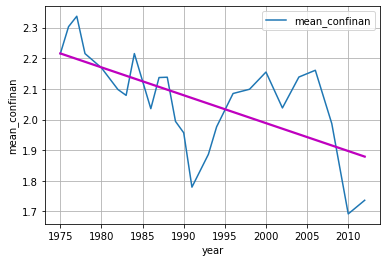

In [12]:
by_year.plot(x = 'year', y = 'mean_confinan', grid = True)
sns.regplot(x = 'year', y = 'mean_confinan', data = by_year, 
            scatter = False, ci = None, fit_reg = True, color = 'm')

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fit regression model
lm_confinan = smf.ols('n_confinan ~ year', data = sub).fit()
lm_confinan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_confinan   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     762.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.65e-166
Time:                        22:02:00   Log-Likelihood:                -34711.
No. Observations:               35053   AIC:                         6.943e+04
Df Residuals:                   35051   BIC:                         6.944e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.4458      0.629     30.912      0.000      18.213      20.679
year          -0.0087      0.000    -27.613      0.000      -0.009      -0.008
==============================================================================
Omnibus:                     1659.545   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.362
Skew:                          -0.072   Prob(JB):                    4.52e-151
Kurtosis:                       2.327   Cond. No.                     3.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='year', ylabel='mean_confinan'>

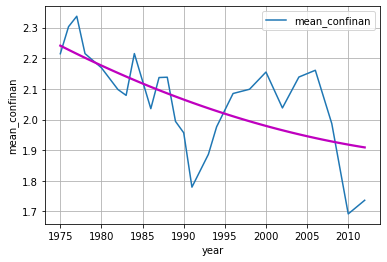

In [14]:
by_year.plot(x = 'year', y = 'mean_confinan', grid = True)

sns.regplot(x = 'year', y = 'mean_confinan', data = by_year, order = 2,
            scatter = False, ci = None, fit_reg = True, color = 'm')

In [18]:
lm_confinansq = smf.ols('n_confinan ~ year + np.square(year)', data = sub).fit()
lm_confinansq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_confinan   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     384.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.09e-165
Time:                        22:00:48   Log-Likelihood:                -34709.
No. Observations:               35053   AIC:                         6.942e+04
Df Residuals:                   35050   BIC:                         6.945e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         304.5799    122.934      2.478      0.013      63.626     545.534
year               -0.2949      0.123     -2.390      0.017      -0.537      -0.053
np.square(year)   7.18e-05    3.1e-05      2.319      0.020    1.11e-05       0.000
==============================================================================
Omnibus:                     1656.987   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.043
Skew:                          -0.072   Prob(JB):                    5.31e-151
Kurtosis:                       2.327   Cond. No.                     1.40e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='year', ylabel='mean_confinan'>

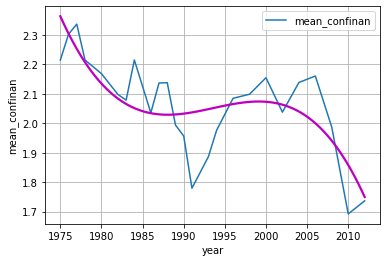

In [15]:
by_year.plot(x = 'year', y = 'mean_confinan', grid = True)

sns.regplot(x = 'year', y = 'mean_confinan', data = by_year, order = 3,
            scatter = False, ci = None, fit_reg = True, color = 'm')

In [19]:
lm_confinancu = smf.ols('n_confinan ~ year + np.square(year) + np.power(year, 3)', data = sub).fit()
lm_confinancu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_confinan   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     383.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.39e-165
Time:                        22:01:34   Log-Likelihood:                -34709.
No. Observations:               35053   AIC:                         6.942e+04
Df Residuals:                   35050   BIC:                         6.945e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0002   9.28e-05      2.553      0.011     5.5e-05       0.000
year                  0.1574      0.062      2.553      0.011       0.037       0.278
np.square(year)      -0.0002   6.19e-05     -2.457      0.014      -0.000   -3.08e-05
np.power(year, 3)  3.693e-08   1.55e-08      2.378      0.017    6.49e-09    6.74e-08
==============================================================================
Omnibus:                     1657.189   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.079
Skew:                          -0.072   Prob(JB):                    5.21e-151
Kurtosis:                       2.327   Cond. No.                     5.87e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
sub['sex'].replace({1: 'Male', 2: 'Female'}, inplace = True)

In [24]:
by_year_sex = sub.groupby(['year', 'sex']).mean()['n_confinan'].unstack()

by_year_sex.head()

sex,Female,Male
year,,
1975,2.257901,2.162328
1976,2.339152,2.258410
1977,2.372236,2.294891
1978,2.212156,2.218898
1980,2.181242,2.152997


Text(0, 0.5, 'mean')

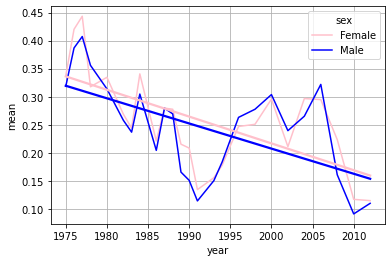

In [40]:
ax = by_year_sex.plot(color = ['pink', 'blue'], grid = True)

sns.regplot(x = by_year_sex.index, y = 'Female', data = by_year_sex,
            scatter = False, ci = None, fit_reg = True, color = 'pink')
sns.regplot(x = by_year_sex.index, y = 'Male', data = by_year_sex,
            scatter = False, ci = None, fit_reg = True, color = 'blue')

ax.set_ylabel('mean')